# Introducción a Keras
Vamos a ver cómo usar Keras para crear modelos de Deep Learning así como sus funcionalidades básicas.

In [1]:
%load_ext watermark
%watermark

2018-03-09T12:00:03+01:00

CPython 3.6.4
IPython 6.2.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [8]:
from IPython.display import Image


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

### Cargamos los datos


In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target

X = data.data[:,:4]
X_std = StandardScaler().fit_transform(X)

y = y.reshape(569,1)

In [10]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

Keras por si mismo no se encarga de hacer todoas las operaciones de bajo nivel (operaciones matriciales), sino que soporta varios backends (el motor que hará el entrenamiento), podemos elegir el que queremos activando la variable de entorno `KERAS_BACKEND`.

Keras soporta los siguientes backends:

- [theano](http://deeplearning.net/software/theano/): Librería de deep learning original de python para deep learning. Hoy en dia raramente se usa por si sola.
- [tensorflow](http://www.tensorflow.org/): Librería de deep learning desarrollada por google. 
- [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/) Librería de deep learning desarrollada por Microsoft

In [11]:
import os

os.environ["KERAS_BACKEND"] = "theano"

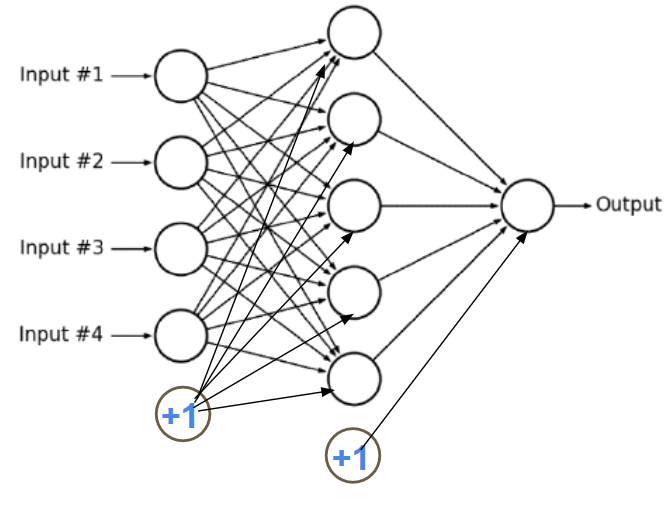

In [12]:
Image("../../media/mlp_con_bias.PNG")

Ésta red neuronal se implementa facilmente con Keras, usando la clase `Sequential`, que es similar a la clase `RedNeuronal` que implementamos a mano. Simplemente admite un conjunto de capas.

In [13]:
from keras.models import Sequential
from keras.layers import Dense


modelo = Sequential()

modelo.add(Dense(units=5, activation='sigmoid', input_shape=(4,)))
modelo.add(Dense(units=1, activation='sigmoid'))

Alternativamente podemos crear el modelo con las capas directamente

In [ ]:
modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4),
    Dense(units=1, activation='sigmoid')
])

Ahora solo queda compilar el modelo y ya quedará preparado para entrenar. A la hora de compilar tenemos que definir la función de pérdidas que medirá el error propagado. 


Keras tambien nos permite especificar métricas que calculará para cada batch de entrenamiento y nos las dará como un historial despues de entrenar

Podemos añadir el optimizador como string si queremos usarlo con sus hiperparámetros por defecto (es decir, no queremos modificar su ratio de aprendizaje o cualquier otro hiperparámetro).

In [14]:
modelo.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Si queremos modificar los parámetros del optimizador tenemos que crear el objeto optimizador. Keras soporta SGD pero tambien muchos otros.

In [15]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01)

In [16]:
modelo.compile(loss="binary_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

Podemos ver una descripción del modelo con `summary`

In [17]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Vemos que tiene 31 parametros para entrenar, esto se corresponde con los pesos de la red.

(4x5 + 5bias  + 5x1 + 1 = 31 pesos)

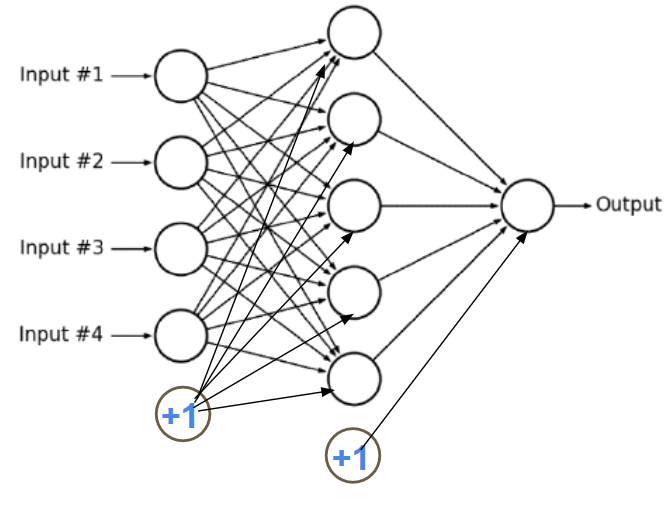

In [18]:
Image("../../media/mlp_con_bias.PNG")

Ahora podemos ajustar el modelo a los datos de entrenamiento con el método `fit`.  Es importante notar que por defecto keras hace **mini batch**, es decir, no entrena con observaciones individuales, sino con grupos de observaciones (definido el tamaño de los grupos con el parámetro `batch_size`)

In [19]:
modelo.fit?

In [20]:
historial = modelo.fit(X_std, y , epochs=100)

Epoch 1/100
569/569 [==============================] - 0s 246us/step - loss: 0.7436 - acc: 0.3286
Epoch 2/100
569/569 [==============================] - 0s 258us/step - loss: 0.7304 - acc: 0.3884
Epoch 3/100
569/569 [==============================] - 0s 255us/step - loss: 0.7180 - acc: 0.4605
Epoch 4/100
569/569 [==============================] - 0s 251us/step - loss: 0.7064 - acc: 0.4938
Epoch 5/100
569/569 [==============================] - 0s 258us/step - loss: 0.6952 - acc: 0.5378
Epoch 6/100
569/569 [==============================] - 0s 264us/step - loss: 0.6845 - acc: 0.5677
Epoch 7/100
569/569 [==============================] - 0s 262us/step - loss: 0.6743 - acc: 0.5835
Epoch 8/100
569/569 [==============================] - 0s 261us/step - loss: 0.6645 - acc: 0.5993
Epoch 9/100
569/569 [==============================] - 0s 262us/step - loss: 0.6550 - acc: 0.5975
Epoch 10/100
569/569 [==============================] - 0s 262us/step - loss: 0.6458 - acc: 0.6098
Epoch 11/100
569/56

569/569 [==============================] - 0s 261us/step - loss: 0.3440 - acc: 0.8963
Epoch 84/100
569/569 [==============================] - 0s 255us/step - loss: 0.3423 - acc: 0.8963
Epoch 85/100
569/569 [==============================] - 0s 250us/step - loss: 0.3408 - acc: 0.8981
Epoch 86/100
569/569 [==============================] - 0s 246us/step - loss: 0.3392 - acc: 0.8981
Epoch 87/100
569/569 [==============================] - 0s 245us/step - loss: 0.3377 - acc: 0.8981
Epoch 88/100
569/569 [==============================] - 0s 248us/step - loss: 0.3363 - acc: 0.8981
Epoch 89/100
569/569 [==============================] - 0s 247us/step - loss: 0.3348 - acc: 0.8981
Epoch 90/100
569/569 [==============================] - 0s 245us/step - loss: 0.3334 - acc: 0.8981
Epoch 91/100
569/569 [==============================] - 0s 249us/step - loss: 0.3320 - acc: 0.8963
Epoch 92/100
569/569 [==============================] - 0s 255us/step - loss: 0.3307 - acc: 0.8963
Epoch 93/100
569/569 [=

Podemos ver la evolución del funcionamiento del modelo desde el historial de entrenamiento

In [21]:
historial.history

{'acc': [0.32864674784387143,
  0.38840070403523103,
  0.46045694210826826,
  0.49384885869252454,
  0.53778558812367683,
  0.56766256506707002,
  0.58347978847517068,
  0.59929701355932463,
  0.59753954410552979,
  0.60984182787276742,
  0.62214411258278501,
  0.62741652010614302,
  0.64147627521273543,
  0.65729349694478278,
  0.67486819106371831,
  0.68892794501802412,
  0.69771529102995866,
  0.71177504351771781,
  0.73110720688094155,
  0.74692442987002894,
  0.75922671405627984,
  0.77152899782351747,
  0.77680140649916207,
  0.79086115877741459,
  0.80316344348743218,
  0.81195079138492654,
  0.81722319817501132,
  0.82601054439645238,
  0.82952548215175559,
  0.83655535986218177,
  0.84358523778211458,
  0.848857644781706,
  0.85413005178129731,
  0.85237258232750246,
  0.85237258253700909,
  0.85237258327028242,
  0.85588752081607888,
  0.86291739873601181,
  0.85940246024743538,
  0.86115993043450356,
  0.86115992854894363,
  0.86291739873601181,
  0.87170474401467291,
  0.86

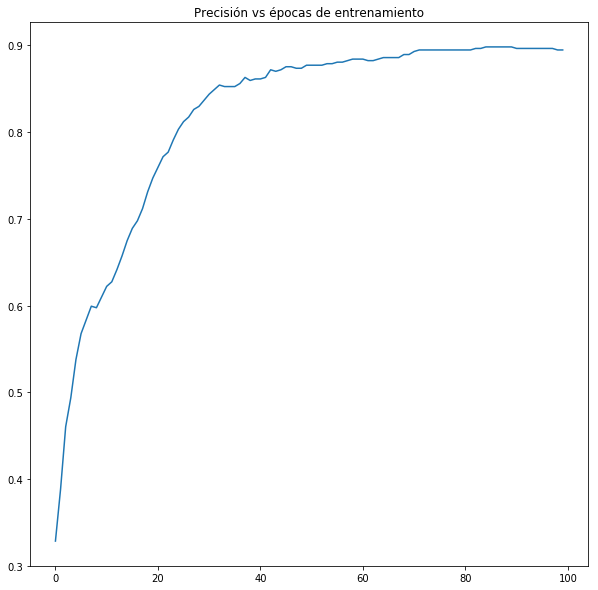

In [22]:
plt.plot(historial.history["acc"])
plt.title("Precisión vs épocas de entrenamiento");

Si queremos que no imprima los logs, podemos pasarle al método `fit` el argumento `verbose=0`

Ahora podemos usar el método `predict` como si fuese un estimador de scikit-learn

In [23]:
modelo.predict(X_std)[:5]

array([[ 0.40731564],
       [ 0.16969231],
       [ 0.15992035],
       [ 0.83255959],
       [ 0.19856198]], dtype=float32)

O si queremos predecir las clases directamente podemos usar `predict_classes`

In [24]:
modelo.predict_classes(X_std)[:5]

569/569 [==============================] - 0s 49us/step


array([[0],
       [0],
       [0],
       [1],
       [0]])

Podemos evaluar el funcionamiento del modelo usando `evaluate`

In [25]:
scores = modelo.evaluate(X_std, y)
scores

569/569 [==============================] - 0s 135us/step


[0.320188275487645, 0.89455184419041989]

In [26]:
modelo.metrics_names

['loss', 'acc']

### Callbacks

`keras` soporta callbacks, que son simplemente funciones que podemos hacer que se ejecuten en cada paso del proceso de entrenamiento. 

Básicamente son clases que heredan de `keras.callbacks.Callback`, con los siguientes métodos disponibles:

- `on_train_begin()` : se ejecuta al iniciar el entrenamiento
- `on_batch_begin()`: se ejecuta al empezar el entrenamiento de un batch (mini batch)
- `on_batch_end()`: se ejecuta al acabar un batch (mini batch)
- `on_epoch_begin()`: se ejecuta al empezar una época de entrenamiento
- `on_epoch_end()`: se ejecuta al acabar una época de entrenamiento

Por ejemplo, Keras calcula lás métricas en cada batch, supongamos que queremos calcular una métrica por época (que es más representativo que hacerlo en un batch)

In [27]:
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score

class MetricasEpoca(Callback):
    def on_train_begin(self, logs={}):
        self.f1_epoca = []
        self.recall_epoca = []
        self.precision_epoca = []
 
    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict_classes(self.validation_data[0])
        val_targ = self.validation_data[1]
        f1 = f1_score(val_targ, val_predict)
        recall = recall_score(val_targ, val_predict)
        precision = precision_score(val_targ, val_predict)
        self.f1_epoca.append(f1)
        self.recall_epoca.append(recall)
        self.precision_epoca.append(precision)
        
        
modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4),
    Dense(units=1, activation='sigmoid')
])
modelo.compile(loss='binary_crossentropy', optimizer=sgd)

metricas_epoca = MetricasEpoca()

modelo.fit(X_std, y, validation_data=(X_std, y),
           epochs=100, verbose=0, callbacks=[metricas_epoca]);

569/569 [==============================] - 0s 44us/step


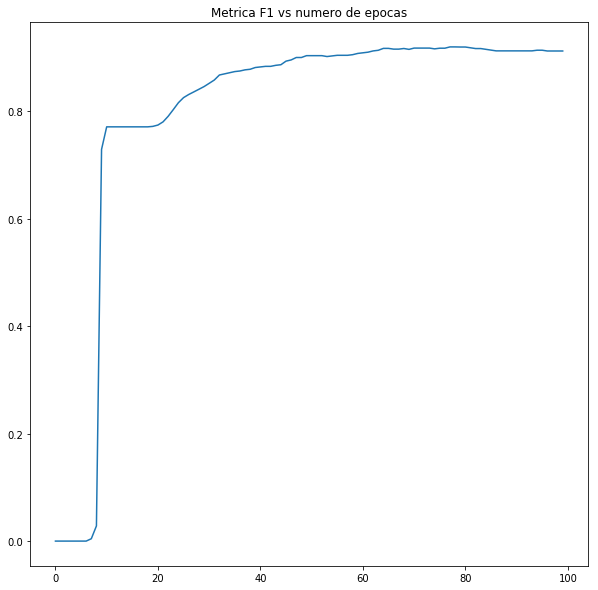

In [28]:
plt.plot(metricas_epoca.f1_epoca)
plt.title("Metrica F1 vs numero de epocas");

### Early Stopping

El entrenamiento de un modelo de deep learning es iterativo, esto significa que en teoría podemos dejar el modelo aprendiendo indefinidamente. En el caso de usar descenso estocástico de gradiente (SGD) para aprender, el error simplemente continuará dando vueltas alrededor del mínimo error.

Para evitar tener que entrenar durante el número definido de épocas si el modelo ya ha convergido antes al mínimo de error, podemos implementar lo que se llama `early stopping`. Básicamente, esto para el entrenamiento cuando se cumplen ciertas condiciones

In [29]:
from keras.callbacks import EarlyStopping

Los parámetros principales del EarlyStopping son los siguientes:
- **monitor**: La métrica a monitorizar
- **min_delta**: la mínima cantidad de variación entre épocas de la métrica para considerarlo un progreso (y continuar entrenando)
- **patience**: número de épocas sin mejora despues de las cuales se para el entrenamiento

In [30]:
earlystop = EarlyStopping(monitor='acc', min_delta=0.00001, patience=10,
                          verbose=1, mode='auto')


modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4),
    Dense(units=1, activation='sigmoid')
])
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["acc"])

modelo.fit(X_std, y, epochs=100, 
           verbose=1, callbacks=[earlystop]);

Epoch 1/100
569/569 [==============================] - 0s 259us/step - loss: 0.8508 - acc: 0.1564
Epoch 2/100
569/569 [==============================] - 0s 256us/step - loss: 0.8139 - acc: 0.1265
Epoch 3/100
569/569 [==============================] - 0s 261us/step - loss: 0.7827 - acc: 0.1125
Epoch 4/100
569/569 [==============================] - 0s 261us/step - loss: 0.7561 - acc: 0.1371
Epoch 5/100
569/569 [==============================] - 0s 263us/step - loss: 0.7332 - acc: 0.2953
Epoch 6/100
569/569 [==============================] - 0s 263us/step - loss: 0.7134 - acc: 0.5571
Epoch 7/100
569/569 [==============================] - 0s 263us/step - loss: 0.6960 - acc: 0.6169
Epoch 8/100
569/569 [==============================] - 0s 261us/step - loss: 0.6807 - acc: 0.6221
Epoch 9/100
569/569 [==============================] - 0s 255us/step - loss: 0.6669 - acc: 0.6274
Epoch 10/100
569/569 [==============================] - 0s 263us/step - loss: 0.6546 - acc: 0.6274
Epoch 11/100
569/56

### Guardado de modelos en Keras.

En Keras, podemos guardar un modelo (de forma similar a como haciamos con `joblib/pickle` en `scikit-learn` tanto durante el proceso de entrenamiento (checkpoints) como al acabar el entrenamiento

In [ ]:
modelo.save

In [31]:
from keras.callbacks import ModelCheckpoint

In [32]:
checkpoint = ModelCheckpoint(filepath='modelo.hdf5', verbose=1, period=10)


modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4),
    Dense(units=1, activation='sigmoid')
])
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["acc"])

modelo.fit(X_std, y, epochs=100, 
           verbose=1, callbacks=[checkpoint]);

Epoch 1/100
569/569 [==============================] - 0s 250us/step - loss: 1.0094 - acc: 0.3726
Epoch 2/100
569/569 [==============================] - 0s 256us/step - loss: 0.9343 - acc: 0.3726
Epoch 3/100
569/569 [==============================] - 0s 250us/step - loss: 0.8711 - acc: 0.3726
Epoch 4/100
569/569 [==============================] - 0s 271us/step - loss: 0.8188 - acc: 0.3726
Epoch 5/100
569/569 [==============================] - 0s 264us/step - loss: 0.7754 - acc: 0.3726
Epoch 6/100
569/569 [==============================] - 0s 263us/step - loss: 0.7395 - acc: 0.3726
Epoch 7/100
569/569 [==============================] - 0s 260us/step - loss: 0.7097 - acc: 0.3726
Epoch 8/100
569/569 [==============================] - 0s 264us/step - loss: 0.6849 - acc: 0.3919
Epoch 9/100
569/569 [==============================] - 0s 253us/step - loss: 0.6641 - acc: 0.6239
Epoch 10/100
569/569 [==============================] - 1s 963us/step - loss: 0.6465 - acc: 0.8120
Epoch 11/100
569/56

569/569 [==============================] - 0s 267us/step - loss: 0.3897 - acc: 0.8770
Epoch 76/100
569/569 [==============================] - 0s 260us/step - loss: 0.3878 - acc: 0.8770
Epoch 77/100
569/569 [==============================] - 0s 264us/step - loss: 0.3858 - acc: 0.8787
Epoch 78/100
569/569 [==============================] - 0s 280us/step - loss: 0.3839 - acc: 0.8787
Epoch 79/100
569/569 [==============================] - 0s 274us/step - loss: 0.3820 - acc: 0.8787
Epoch 80/100
569/569 [==============================] - 0s 516us/step - loss: 0.3802 - acc: 0.8787
Epoch 81/100
569/569 [==============================] - 0s 270us/step - loss: 0.3783 - acc: 0.8822
Epoch 82/100
569/569 [==============================] - 0s 269us/step - loss: 0.3765 - acc: 0.8805
Epoch 83/100
569/569 [==============================] - 0s 266us/step - loss: 0.3748 - acc: 0.8805
Epoch 84/100
569/569 [==============================] - 0s 282us/step - loss: 0.3730 - acc: 0.8805
Epoch 85/100
569/569 [=

In [33]:
!dir

 Volume in drive E has no label.
 Volume Serial Number is D862-E35E

 Directory of E:\Backup\Proyectos\curso_udemy\Secciones\Seccion4.Deep_Learning\intro_a_keras

09/03/2018  18:27    <DIR>          .
09/03/2018  18:27    <DIR>          ..
09/03/2018  17:35    <DIR>          .ipynb_checkpoints
09/03/2018  15:40           460.333 intro a Keras - INTERNAL.ipynb
09/03/2018  18:27           448.388 intro a Keras.ipynb
04/03/2018  17:54             6.875 model.png
09/03/2018  18:29            20.240 modelo.hdf5
09/03/2018  17:51    <DIR>          screencast
               4 File(s)        935.836 bytes
               4 Dir(s)  149.897.416.704 bytes free


Ahora podemos recargar el modelo guardado con `load_model`

In [34]:
from keras.models import load_model

In [35]:
modelo_recargado = load_model("modelo.hdf5")

In [36]:
modelo_recargado.predict(X_std)[:5]

array([[ 0.35798541],
       [ 0.21151216],
       [ 0.21038111],
       [ 0.85574615],
       [ 0.23248169]], dtype=float32)

### Validación Cruzada

Podemos crear Redes en keras de forma que sean compatibles con [Scikit-learn](https://keras.io/scikit-learn-api/)

En Deep Learning, en  general no se suele hacer validación cruzada a menos que el dataset sea pequeño, ya que los tiempos de entrenamiento de modelos y los datasets suelen ser bastante elevados. No obstante si podemos permitirnoslo es aconsejable.

In [38]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

def generar_modelo():
    modelo = Sequential()
    modelo.add(Dense(units=5, activation='sigmoid', input_dim=4))
    modelo.add(Dense(units=1, activation='sigmoid'))
    sgd = SGD(lr=0.01)
    modelo.compile(loss="binary_crossentropy",
              optimizer=sgd,
              metrics=['accuracy'])
    return modelo

kfold = StratifiedKFold()
cvscores = []
for train, test in kfold.split(X_std, y):
    modelo = generar_modelo()
    modelo.fit(X_std[train], y[train], epochs=100, verbose=0)
    scores = modelo.evaluate(X_std[test], y[test], verbose=0)
    cvscores.append(scores[1] )

In [41]:
StratifiedKFold?

In [40]:
cvscores

[0.84210526315789469, 0.88421052192386829, 0.90476190318506233]

In [39]:
np.mean(cvscores)

0.87702589608894177

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_test_split?

### Optimización de hiperparámetros

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier

def generar_modelo(n_oculta=5, activacion="sigmoid"):
    modelo = Sequential()
    modelo.add(Dense(units=n_oculta, activation=activacion, input_dim=4))
    modelo.add(Dense(units=1, activation='sigmoid'))
    sgd = SGD(lr=0.0001)
    modelo.compile(loss="binary_crossentropy",
              optimizer=sgd,
              metrics=['accuracy'])
    return modelo

modelo = KerasClassifier(build_fn=generar_modelo, verbose=0)

In [45]:
modelo

También vamos a añadir una variable de entorno para controlar como funciona la búsqueda de malla. Generalmente pasamos el argumento `n_jobs=-1`, que le indica a sklearn que puede usar todos los núcleos de nuestro ordenador (generalmente 4 u 8). Èsto puede dar problemas al ejecutar el código desde un Jupyter notebook.

In [46]:
os.environ["JOBLIB_START_METHOD"] = "forkserver"

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {
    "epochs": [10,30],
    "n_oculta": [5,20],
    "activacion": ["sigmoid", "relu"]
}
grid = GridSearchCV(estimator=modelo, param_grid=param_grid, n_jobs=1,  scoring="accuracy")
grid_result = grid.fit(X_std, y)

In [50]:
grid_result

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E710B3E898>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [10, 30], 'n_oculta': [5, 20], 'activacion': ['sigmoid', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
grid_result.predict(X_std)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [52]:
print("Mejor estimador (error {:.5f}): {}".format(grid_result.best_score_,
                                                  grid_result.best_params_))

Mejor estimador (error 0.72935): {'activacion': 'sigmoid', 'epochs': 10, 'n_oculta': 5}
